In [1]:
import warnings                   # 경고 메시지를 출력하고 싶지 않을 경우 import 한다.
warnings.filterwarnings("ignore") # 경고 메시지를 출력하지 않는다. 경고 메시지를 보고 싶으면 default로 지정한다.
from IPython.display import Image # 쥬피터 노트북에 이미지를 출력할 수 있게 한다.
import numpy as np                # 수치 계산 도구
import pandas as pd               # 데이터 분석 도구
import matplotlib.pyplot as plt   # 시각화 도구
plt.rcParams["font.size"] = 10    # matplotlib의 글꼴 크기
plt.rcParams["font.family"] = "NanumGothicCoding" # matplotlib의 글꼴
import matplotlib as mpl          # matplotlib에서 음수 데이터의 '-' 글꼴이 깨지는 것을 방지하기 위해 import 한다.
mpl.rcParams["axes.unicode_minus"] = False # '-' 글꼴을 깨지지 않게 한다.
import seaborn as sns             # matplotlib를 기반으로 한 시각화 두구
from plotnine import *            # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구
import missingno as msno          # 결측치 분포를 그래프 형태로 시각화 하는 도구
# 쥬피터 노트북에서 그래프를 출력할 수 있게 한다.
%matplotlib inline
import folium                     # 지도 시각화 도구

서울시 공무원의 업무 추진비를 분석한 공무원 맞집 찾기 프로젝트  
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯해서 4급 부서장 이상의 간부직 공무원의 업무 추진비집행 내역을 공개한다.  
서울시 업무 추진비 url => https://opengov.seoul.go.kr/expense

In [4]:
# read_csv() 메소드에 index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있다.
df = pd.read_csv('./data/raw.csv', index_col='연번')
df.shape

(51456, 9)

In [5]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [6]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
42,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
43,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [7]:
# dtypes 또는 info() 메소드로 각열의 정보를 확인한다.
df.dtypes

1소속부서     object
결제방법      object
구분        object
대상인원      object
부서명       object
집행금액     float64
집행목적      object
집행일시      object
집행장소      object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


<AxesSubplot:>

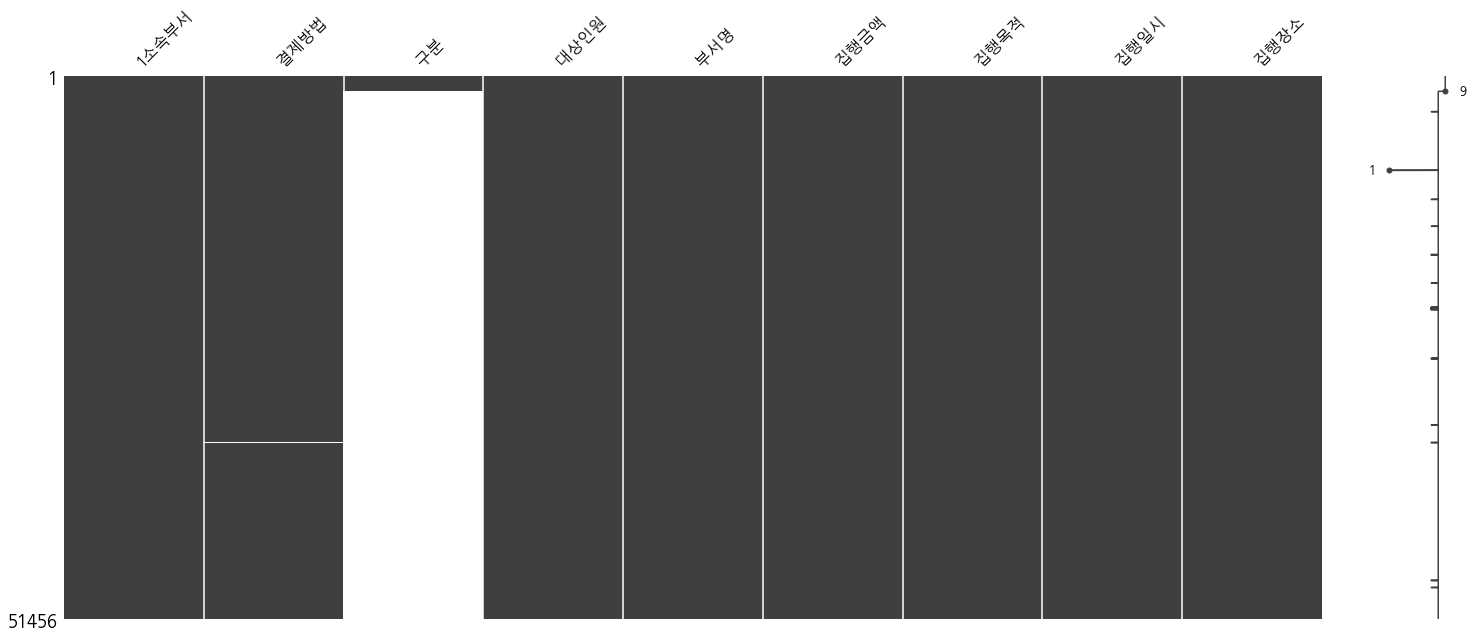

In [9]:
# missingno 패키지로 결측치를 시각화 해 본다.
msno.matrix(df)

In [11]:
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [12]:
# 집행일시에 NaN(결측치) 데이터가 있다. 해당 데이터를 확인해 본다.
df[df['집행일시'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 집행일시의 결칙치 데이터를 얻어온다.
missing_df_row = df[df['집행일시'].isnull()].index[0]
missing_df_row

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [15]:
# 해당 행을 누락시키고 다시 df 데이터프레임을 저장한다.
print(df.shape)
df = df.drop(missing_df_row)
print(df.shape)

(51456, 9)
(51455, 9)


In [30]:
# 집행일시 열을 이용해서 '연', '월', '연월', '시', '분', '요일' 파생 변수를 만든다.
# 판다스에 to_datetime() 메소드를 사용하면 문자열 데이터를 날짜/시간 형태으이 데이터로 변환할 수 있다.
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day.astype(int)
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
df['요일'] = df['집행일시'].dt.dayofweek.astype(int) # 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
연번,,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-1,19,20,41,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-1,23,19,6,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-1,29,20,13,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,10,4


<AxesSubplot:xlabel='연', ylabel='count'>

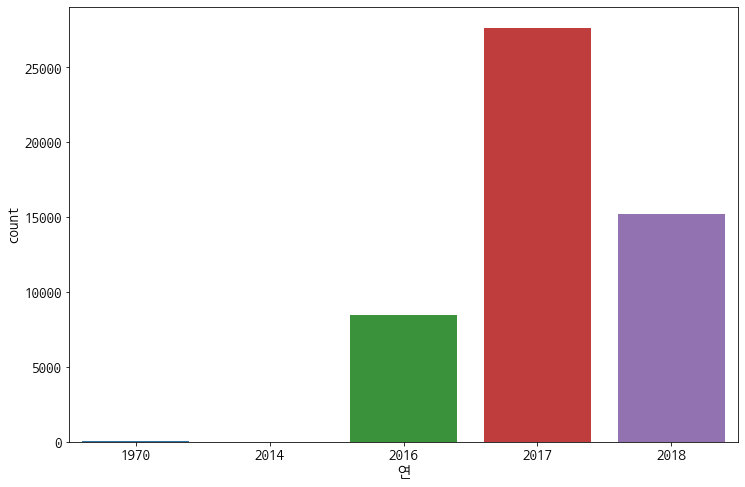

In [37]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='연')

<AxesSubplot:xlabel='월', ylabel='count'>

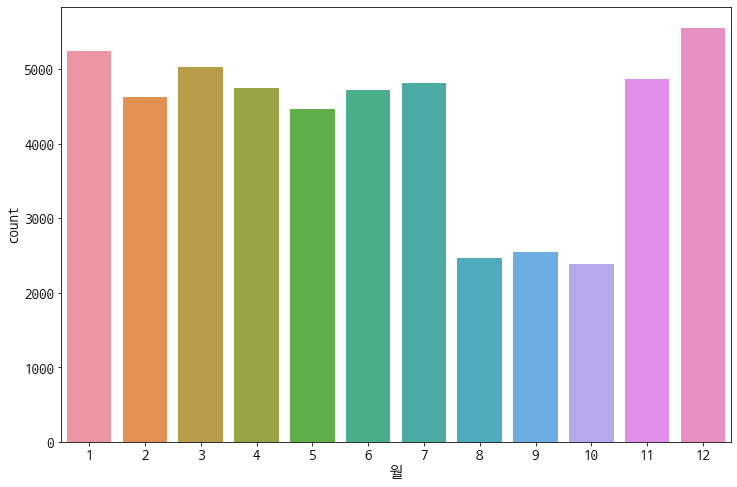

In [38]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='월')

<AxesSubplot:xlabel='연월', ylabel='count'>

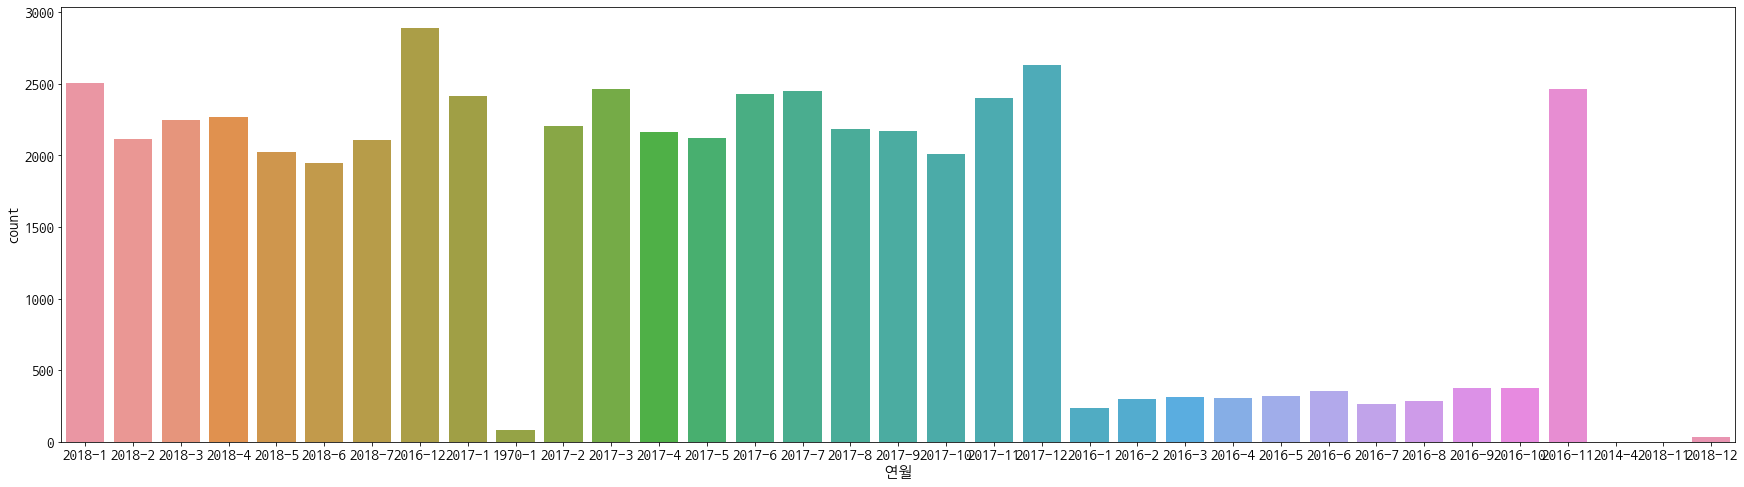

In [40]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='연월')

In [49]:
# 그래프에서 연월 순으로 보기 위해서 연, 월의 오름차순으로 정렬한다.
df = df.sort_values(by=['연', '월'], ascending=True)

<AxesSubplot:xlabel='연월', ylabel='count'>

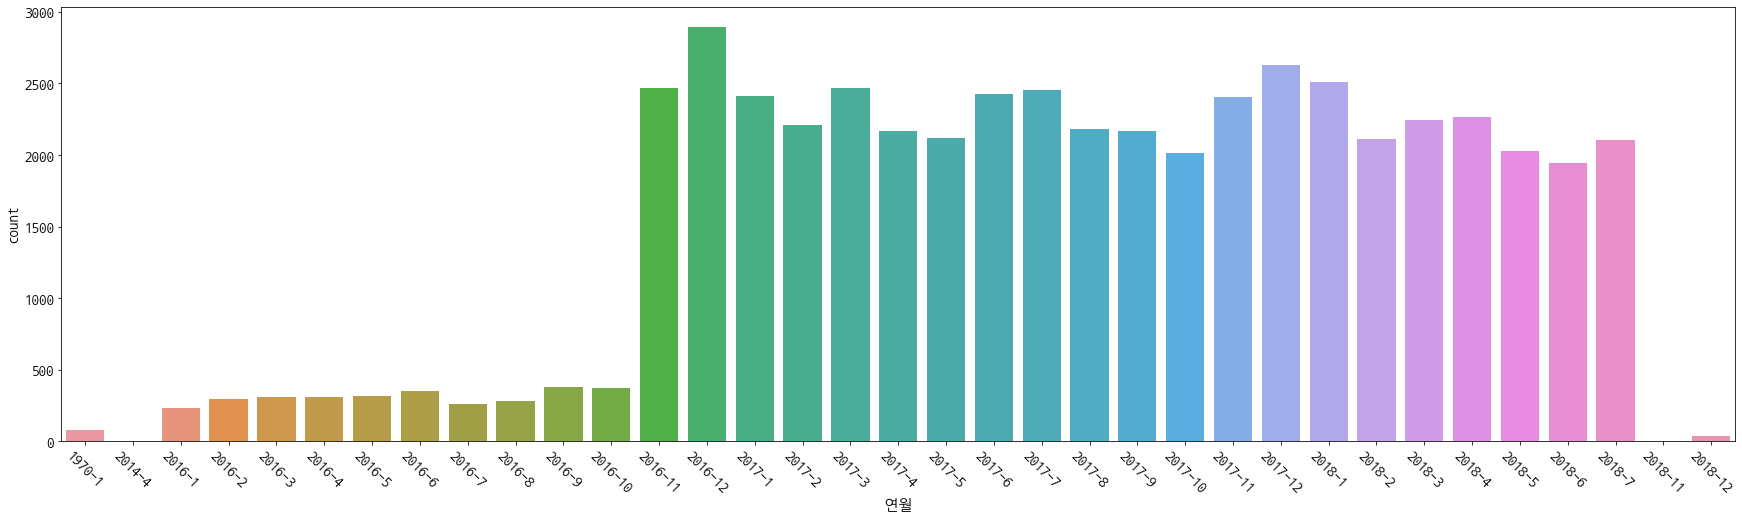

In [52]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
plt.xticks(rotation=-45)
sns.countplot(data=df, x='연월')

<AxesSubplot:xlabel='일', ylabel='count'>

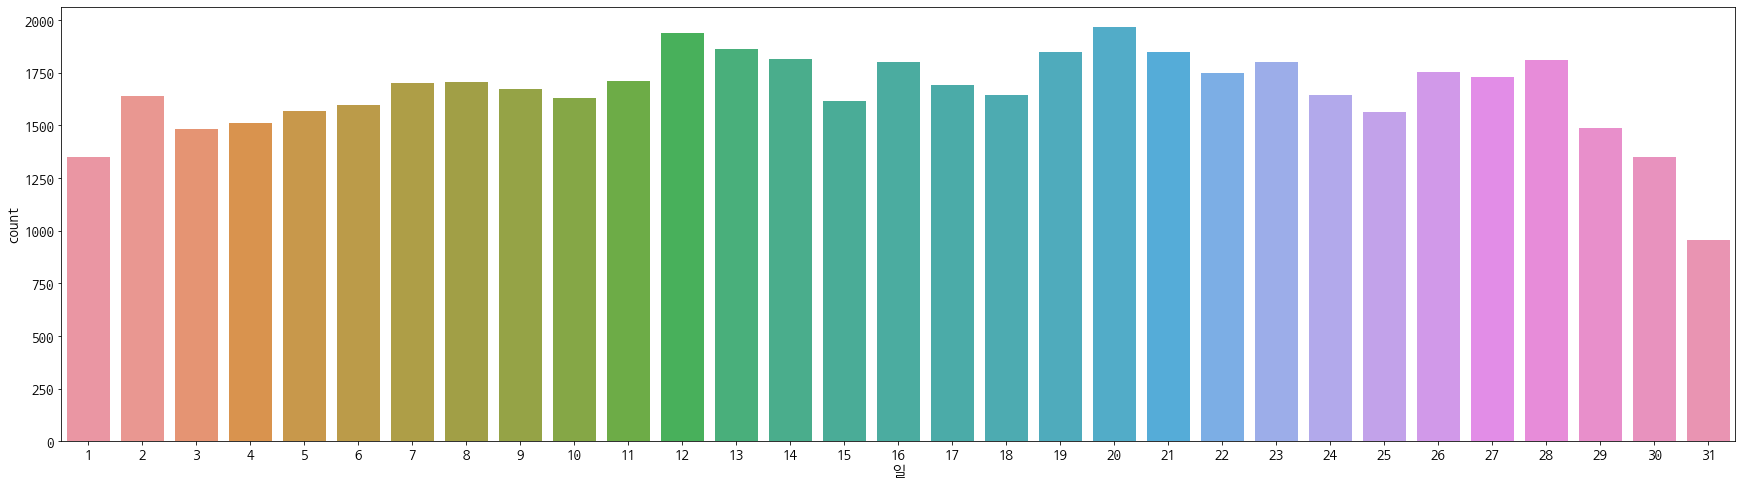

In [53]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='일')

<AxesSubplot:xlabel='시', ylabel='count'>

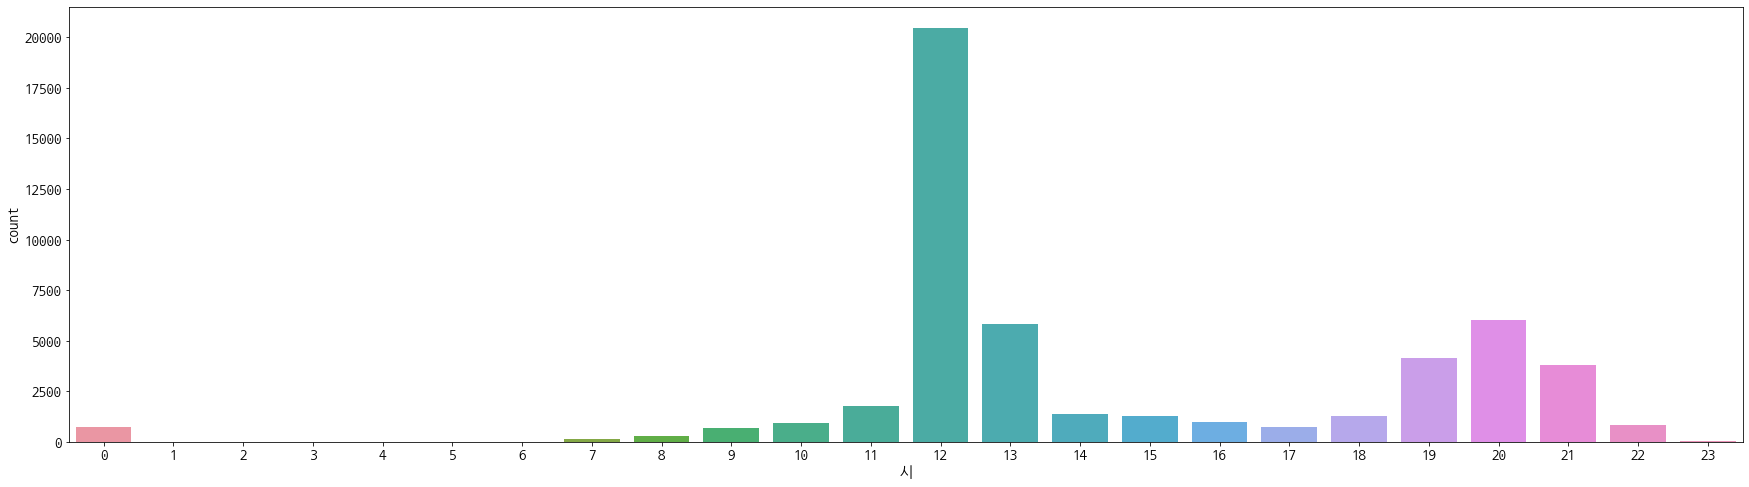

In [54]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='시')

<AxesSubplot:xlabel='요일', ylabel='count'>

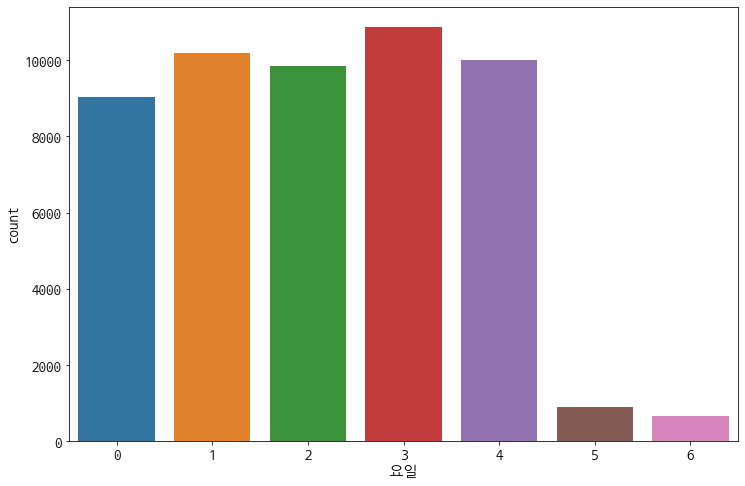

In [57]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='요일')

In [58]:
# 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['요일_한글'] = df['요일'].apply(lambda x: weekday_map[x])
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
17,복지본부,카드,NaN,장애인일자리창출팀장 외 5명,복지본부 장애인복지정책과,174000.0,장애인일자리대장정 정책수립을 위한 간담회,1970-01-01 09:00:00,해우리 (무교점),1970,1,1970-1,1,9,0,3,목
23,행정국,카드,NaN,인력개발과장 외 5명,일력개발과,66000.0,구내매점 활성화 방안 검토 간담회 개최,1970-01-01 09:00:00,남원정 (중구 세종대로 135-7),1970,1,1970-1,1,9,0,3,목
24,행정국,카드,NaN,인력개발과장 외 11명,일력개발과,66000.0,노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최,1970-01-01 09:00:00,신성식당 (중구 세종대로14길 22-3),1970,1,1970-1,1,9,0,3,목
25,행정국,카드,NaN,인력개발과장 외 15명,일력개발과,66000.0,인력개발과 부속실 직원들과 친절교육 및 간담회 개최,1970-01-01 09:00:00,라칸티나 (중구 을지로),1970,1,1970-1,1,9,0,3,목
21,행정국,카드,NaN,복지노무팀장 외 6명,일력개발과,66000.0,후생복지팀 현안업무 검토 간담회 개최,1970-01-01 09:00:00,전주식당 (중구 창경궁로 67-13),1970,1,1970-1,1,9,0,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,시민건강국,카드,NaN,보건정책팀장 등 10명,보건의료정책과,250000.0,공공의료아카데미 사업추진관련 유관부서 간담회비 지급,2018-12-12 13:48:00,동해일식(중구 무교로16),2018,12,2018-12,12,13,48,2,수
13,시민건강국,카드,NaN,시민건강국장 등 6명,보건의료정책과,125000.0,시민건강국 조직운영관련 유관부서 간담회비 지급,2018-12-12 13:45:00,남도한식(중구 을지로78),2018,12,2018-12,12,13,45,2,수
12,시민건강국,카드,NaN,방문민원,보건의료정책과,300000.0,시민건강국 방문민원 접대용 다과 등 구입,2018-12-12 14:44:00,서울시청신매점(중구 세종대로110),2018,12,2018-12,12,14,44,2,수


<AxesSubplot:xlabel='요일_한글', ylabel='count'>

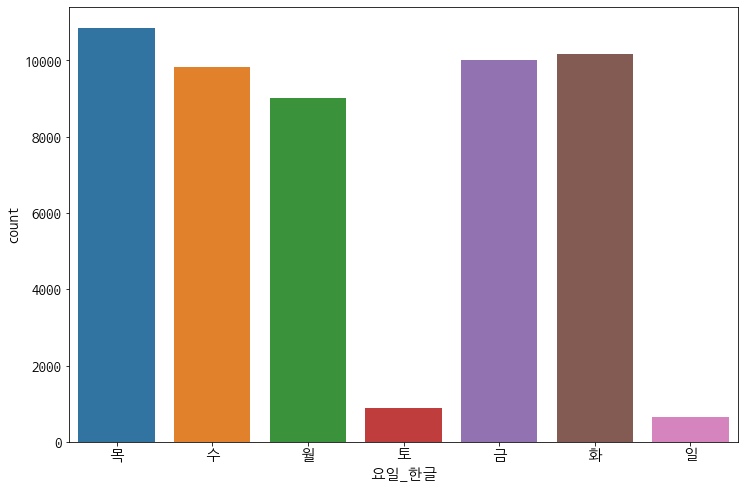

In [63]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='요일_한글')

<AxesSubplot:xlabel='요일_한글', ylabel='count'>

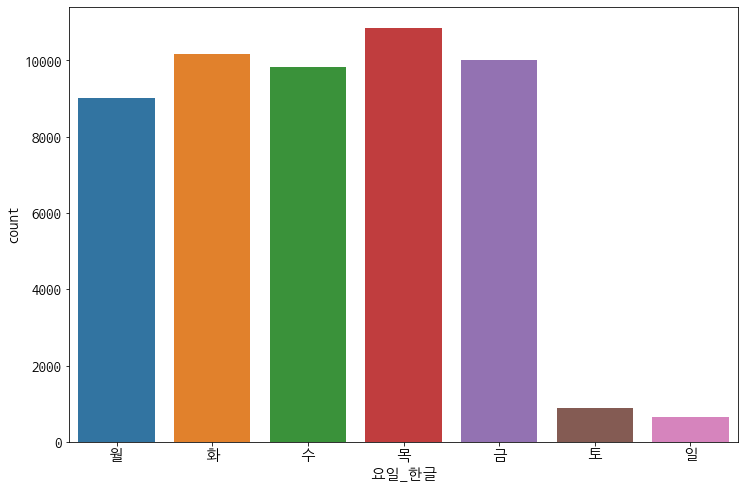

In [62]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df.sort_values(by='요일'), x='요일_한글')

<AxesSubplot:xlabel='연', ylabel='집행금액'>

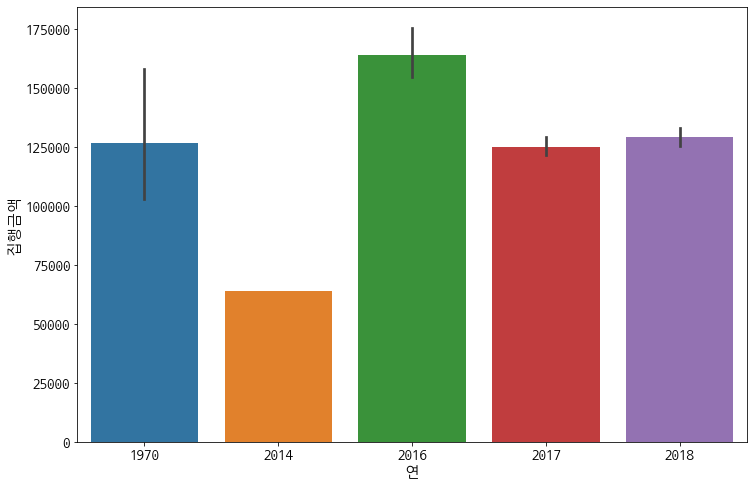

In [64]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='연', y='집행금액')

<AxesSubplot:xlabel='월', ylabel='집행금액'>

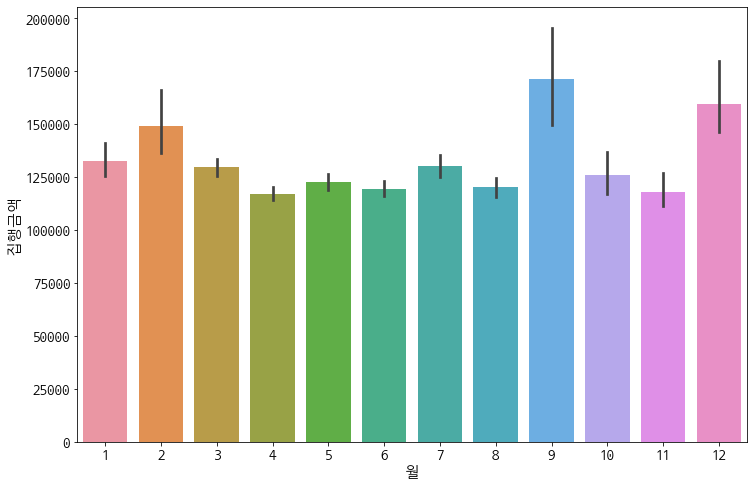

In [65]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='월', y='집행금액')

<AxesSubplot:xlabel='연월', ylabel='집행금액'>

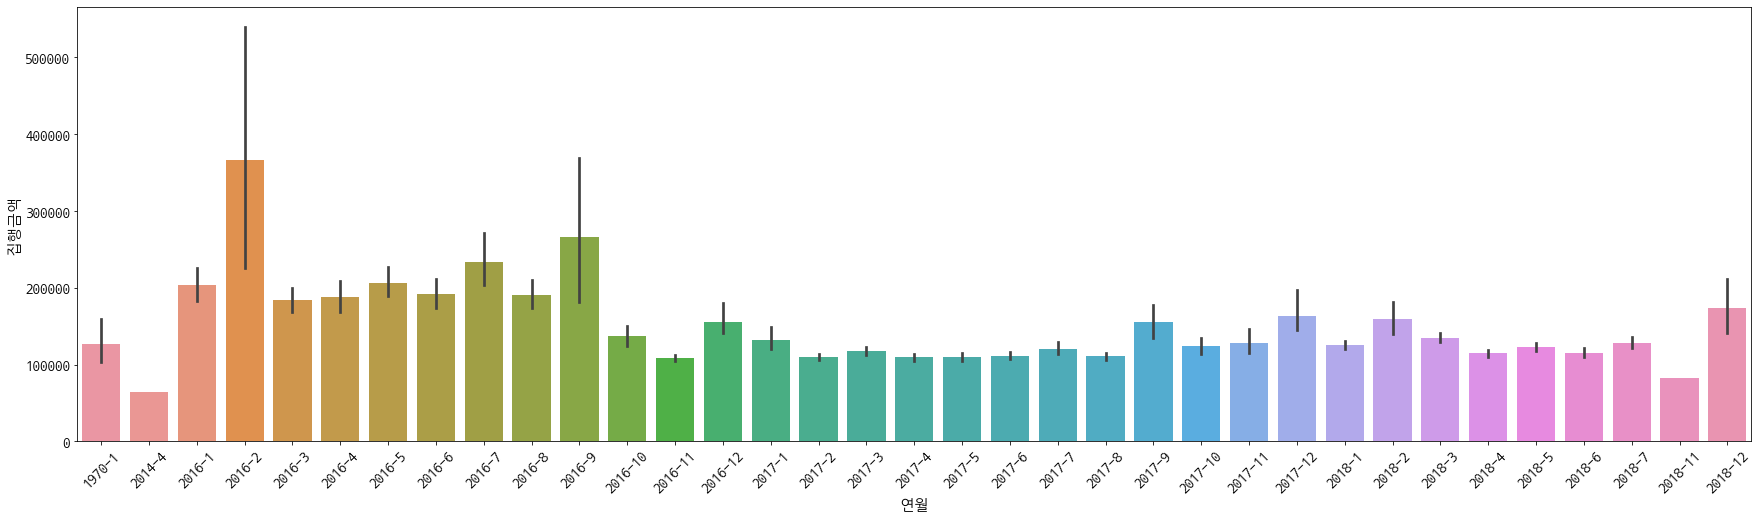

In [67]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.barplot(data=df, x='연월', y='집행금액')

<AxesSubplot:xlabel='일', ylabel='집행금액'>

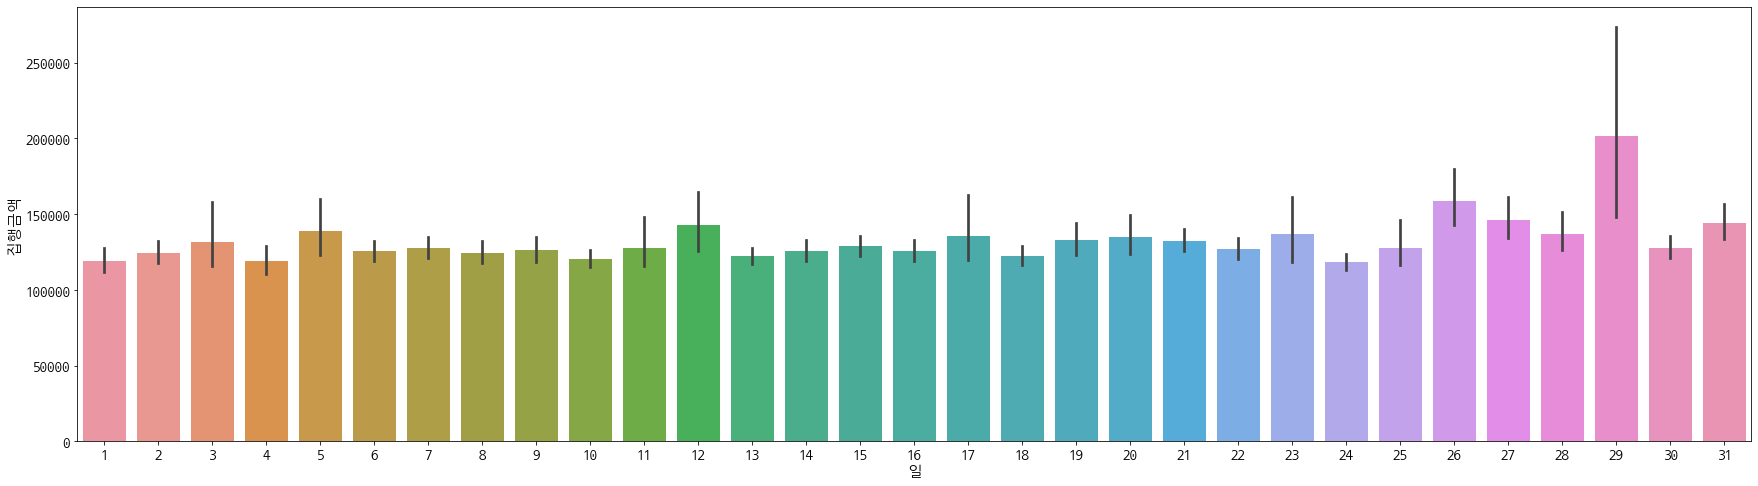

In [68]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='일', y='집행금액')

<AxesSubplot:xlabel='시', ylabel='집행금액'>

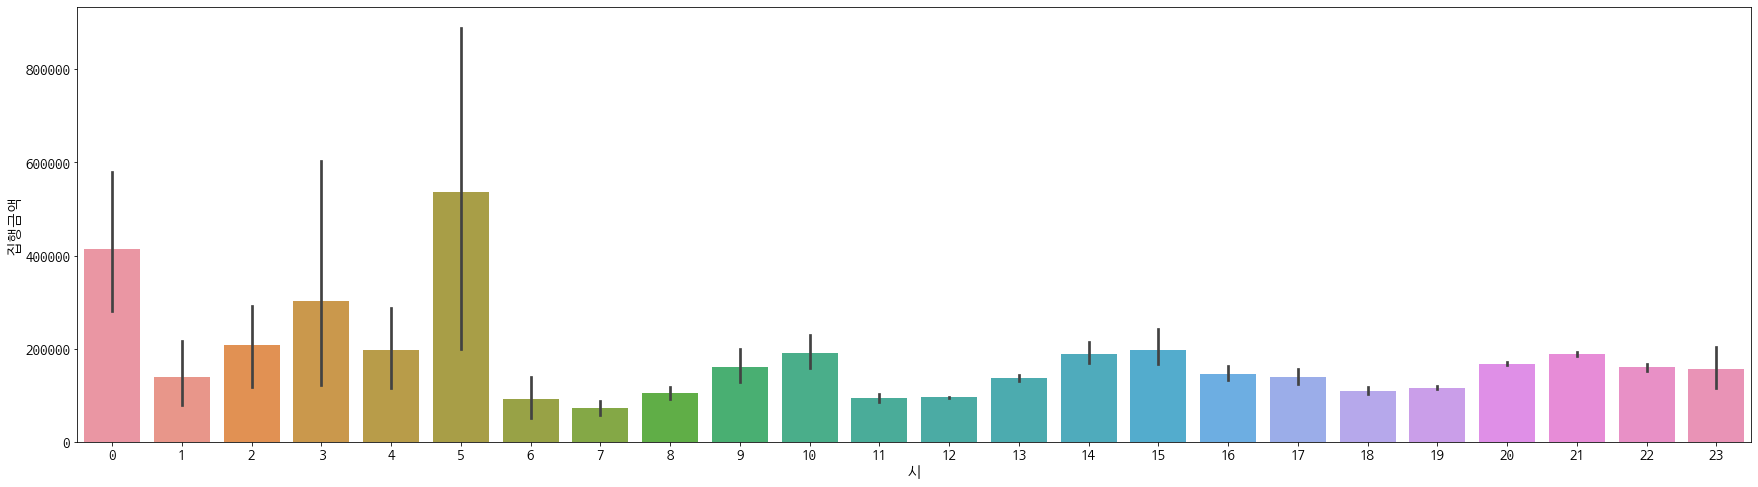

In [69]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rc('font', size=15)
sns.barplot(data=df, x='시', y='집행금액')

<AxesSubplot:xlabel='요일_한글', ylabel='집행금액'>

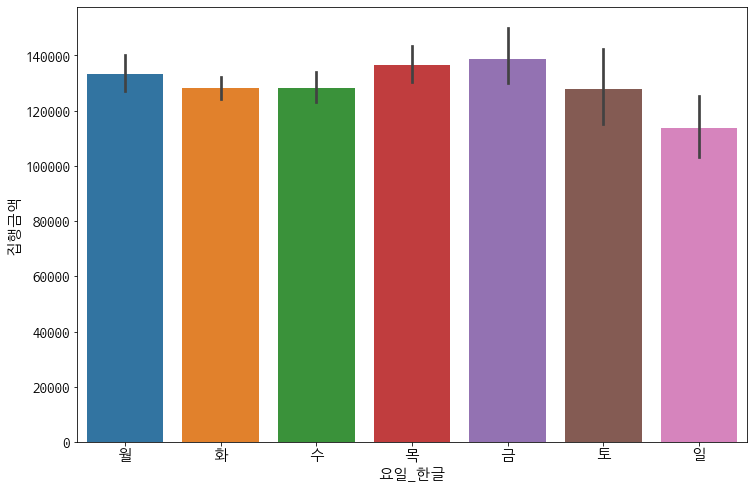

In [73]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.barplot(data=df.sort_values(by='요일'), x='요일_한글', y='집행금액')

집행 목적 워드클라우드

In [74]:
from wordcloud import WordCloud

In [75]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
17,복지본부,카드,NaN,장애인일자리창출팀장 외 5명,복지본부 장애인복지정책과,174000.0,장애인일자리대장정 정책수립을 위한 간담회,1970-01-01 09:00:00,해우리 (무교점),1970,1,1970-1,1,9,0,3,목
23,행정국,카드,NaN,인력개발과장 외 5명,일력개발과,66000.0,구내매점 활성화 방안 검토 간담회 개최,1970-01-01 09:00:00,남원정 (중구 세종대로 135-7),1970,1,1970-1,1,9,0,3,목
24,행정국,카드,NaN,인력개발과장 외 11명,일력개발과,66000.0,노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최,1970-01-01 09:00:00,신성식당 (중구 세종대로14길 22-3),1970,1,1970-1,1,9,0,3,목
25,행정국,카드,NaN,인력개발과장 외 15명,일력개발과,66000.0,인력개발과 부속실 직원들과 친절교육 및 간담회 개최,1970-01-01 09:00:00,라칸티나 (중구 을지로),1970,1,1970-1,1,9,0,3,목
21,행정국,카드,NaN,복지노무팀장 외 6명,일력개발과,66000.0,후생복지팀 현안업무 검토 간담회 개최,1970-01-01 09:00:00,전주식당 (중구 창경궁로 67-13),1970,1,1970-1,1,9,0,3,목


In [76]:
# 집행목적이 누락값인 데이터를 확인한다.
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
8,여성가족정책실,카드,NaN,아동복지권리팀장외 3명,여성가족정책실 가족담당관,70000.0,NaN,2017-02-22 16:55:00,행복한하루소바 (서울 중구 무교로),2017,2,2017-2,22,16,55,2,수
10,여성가족정책실,카드,NaN,출산장려팀장외 3명,여성가족정책실 가족담당관,40500.0,NaN,2017-02-23 12:07:00,포베이무교점 (서울 중구 무교동),2017,2,2017-2,23,12,7,3,목
11,여성가족정책실,카드,NaN,가족담당관 직원 19명,여성가족정책실 가족담당관,40000.0,NaN,2017-02-23 12:34:00,삼원 (서울 중구 무교로 32),2017,2,2017-2,23,12,34,3,목
9,여성가족정책실,카드,NaN,가족정책팀장외 5명,여성가족정책실 가족담당관,125000.0,NaN,2017-02-22 21:36:00,신촌서서갈비（북창본 (서울 중구 세종대로12길 25),2017,2,2017-2,22,21,36,2,수
7,여성가족정책실,카드,NaN,가족담당관외 20명,여성가족정책실 가족담당관,62000.0,NaN,2017-02-21 19:37:00,갯마을낙지 (서울 중구 을지로1길 32),2017,2,2017-2,21,19,37,1,화
6,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,87500.0,NaN,2017-02-14 12:55:00,동성각 (서울 종로구 새문안로9길 29-2),2017,2,2017-2,14,12,55,1,화
1,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7),2017,2,2017-2,1,12,3,2,수
2,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51),2017,2,2017-2,1,15,30,2,수
3,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로),2017,2,2017-2,10,9,48,4,금


In [77]:
# 집행목적이 누락값인 데이터가 존재하므로 누락값을 공백으로 채워준다.
df['집행목적'] = df['집행목적'].fillna('')
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,


In [79]:
# 파이썬 문자열 메소드 중 특정 문자열을 문자열 사이에 삽입하는 join() 메소드를 사용해서 집행목적을 연결해 워드클라우드를
# 실행한다.
spend_gubun = ' '.join(df['집행목적'])
spend_gubun[:100]

'장애인일자리대장정 정책수립을 위한 간담회 구내매점 활성화 방안 검토 간담회 개최 노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최 인력개발과 부속실 직원들과 '

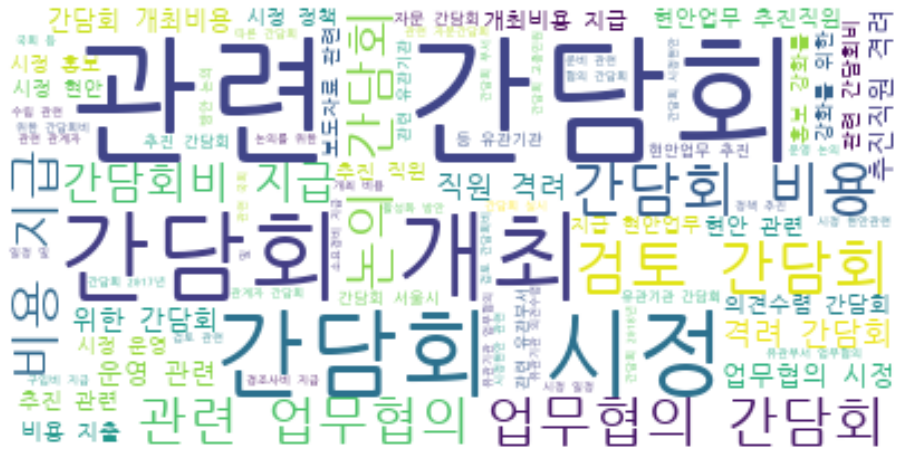

In [86]:
wordcloud = WordCloud(
    font_path='c:/wondows/fonts/나눔고딕코딩.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(spend_gubun)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

집행장소 워드 클라우드

In [88]:
# 집행장소가 누락값인 데이터를 확인한다.
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
10,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,용산구도시관리국직원 경조사비 지급,2016-01-09,NaN,2016,1,2016-1,9,0,0,5,토
31,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시재생본부직원경조사비 지급,2016-01-22,NaN,2016,1,2016-1,22,0,0,4,금
32,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,강북구기획재정국직원 경조사비 지급,2016-01-23,NaN,2016,1,2016-1,23,0,0,5,토
33,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-01-23,NaN,2016,1,2016-1,23,0,0,5,토
23,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,한강사업본부직원경조사비 지급 지급,2016-01-16,NaN,2016,1,2016-1,16,0,0,5,토
14,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,물순환안전국직원경조사비 지급,2016-02-08,NaN,2016,2,2016-2,8,0,0,0,월
38,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,관악구도시관리국직원 경조사비 지급,2016-02-20,NaN,2016,2,2016-2,20,0,0,5,토
37,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,주택건축국직원경조사비 지급,2016-02-20,NaN,2016,2,2016-2,20,0,0,5,토
36,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,상수도사업본부직원경조사비 지급,2016-02-20,NaN,2016,2,2016-2,20,0,0,5,토


In [89]:
# 집행장소가 누락값인 데이터가 존재하므로 누락값을 공백으로 채워준다.
df['집행장소'] = df['집행장소'].fillna('')
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,


In [90]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
연번,,,,,,,,,,,,,,,,,
17,복지본부,카드,NaN,장애인일자리창출팀장 외 5명,복지본부 장애인복지정책과,174000.0,장애인일자리대장정 정책수립을 위한 간담회,1970-01-01 09:00:00,해우리 (무교점),1970,1,1970-1,1,9,0,3,목
23,행정국,카드,NaN,인력개발과장 외 5명,일력개발과,66000.0,구내매점 활성화 방안 검토 간담회 개최,1970-01-01 09:00:00,남원정 (중구 세종대로 135-7),1970,1,1970-1,1,9,0,3,목
24,행정국,카드,NaN,인력개발과장 외 11명,일력개발과,66000.0,노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최,1970-01-01 09:00:00,신성식당 (중구 세종대로14길 22-3),1970,1,1970-1,1,9,0,3,목
25,행정국,카드,NaN,인력개발과장 외 15명,일력개발과,66000.0,인력개발과 부속실 직원들과 친절교육 및 간담회 개최,1970-01-01 09:00:00,라칸티나 (중구 을지로),1970,1,1970-1,1,9,0,3,목
21,행정국,카드,NaN,복지노무팀장 외 6명,일력개발과,66000.0,후생복지팀 현안업무 검토 간담회 개최,1970-01-01 09:00:00,전주식당 (중구 창경궁로 67-13),1970,1,1970-1,1,9,0,3,목


In [91]:
# 집행장소에 주소가 많이 보이기 때문에 주소는 전처리를 통해 제거하고 상호명이라는 열을 만들어 집행장소에서 상호명을 가져온다.
# 상호명이 여는 괄호 앞쪽에 있는 것들은 여는 괄오 앞에 있는 것을 상호명으로 한다.
df['상호명'] = df['집행장소'].apply(lambda x: x.split('(')[0].strip())
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
연번,,,,,,,,,,,,,,,,,,
17,복지본부,카드,NaN,장애인일자리창출팀장 외 5명,복지본부 장애인복지정책과,174000.0,장애인일자리대장정 정책수립을 위한 간담회,1970-01-01 09:00:00,해우리 (무교점),1970,1,1970-1,1,9,0,3,목,해우리
23,행정국,카드,NaN,인력개발과장 외 5명,일력개발과,66000.0,구내매점 활성화 방안 검토 간담회 개최,1970-01-01 09:00:00,남원정 (중구 세종대로 135-7),1970,1,1970-1,1,9,0,3,목,남원정
24,행정국,카드,NaN,인력개발과장 외 11명,일력개발과,66000.0,노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최,1970-01-01 09:00:00,신성식당 (중구 세종대로14길 22-3),1970,1,1970-1,1,9,0,3,목,신성식당
25,행정국,카드,NaN,인력개발과장 외 15명,일력개발과,66000.0,인력개발과 부속실 직원들과 친절교육 및 간담회 개최,1970-01-01 09:00:00,라칸티나 (중구 을지로),1970,1,1970-1,1,9,0,3,목,라칸티나
21,행정국,카드,NaN,복지노무팀장 외 6명,일력개발과,66000.0,후생복지팀 현안업무 검토 간담회 개최,1970-01-01 09:00:00,전주식당 (중구 창경궁로 67-13),1970,1,1970-1,1,9,0,3,목,전주식당


In [93]:
# 상호명이 공백인 데이터의 집행목적을 확인한다.
df.loc[df['상호명'] == '', '집행목적'].value_counts().head()

현안업무 추진직원 격려 간담회 개최비용 지급    7
상수도사업본부직원경조사비 지급            4
도시기반시설본부직원 경조사비 지급          3
부서운영을 위한 원두커피 구입비 지급        3
생활복지통합관리시스템 교육 참석자 간담회      2
Name: 집행목적, dtype: int64

In [94]:
# 상호명이 '대상자 소속부서'인 데이터의 집행목적을 확인한다.
df.loc[df['상호명'] == '대상자 소속부서', '집행목적'].value_counts().head()

경조금 지급       126
경조금 지급 2건     14
경조금 지급 3건     11
경조금 2건         9
경조금 지급 5건      6
Name: 집행목적, dtype: int64

In [95]:
# 상호명이 '-'인 데이터의 집행목적을 확인한다.
df.loc[df['상호명'] == '-', '집행목적'].value_counts().head()

소속 상근직원 경조사비 지급    82
소속직원 경조사비 지급       33
축.부의금 지급           31
소속직원 경조사비 지출       20
축의금 지급             19
Name: 집행목적, dtype: int64

In [96]:
# 상호명이 공백, '대상자 소속부서', '-'인 데이터(잘못된 데이터)를 제거한다.
df_shop = df[(df['상호명'] != '') & (df['상호명'] != '대상자 소속부서') & (df['상호명'] != '-')]
df_shop

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
연번,,,,,,,,,,,,,,,,,,
17,복지본부,카드,NaN,장애인일자리창출팀장 외 5명,복지본부 장애인복지정책과,174000.0,장애인일자리대장정 정책수립을 위한 간담회,1970-01-01 09:00:00,해우리 (무교점),1970,1,1970-1,1,9,0,3,목,해우리
23,행정국,카드,NaN,인력개발과장 외 5명,일력개발과,66000.0,구내매점 활성화 방안 검토 간담회 개최,1970-01-01 09:00:00,남원정 (중구 세종대로 135-7),1970,1,1970-1,1,9,0,3,목,남원정
24,행정국,카드,NaN,인력개발과장 외 11명,일력개발과,66000.0,노사협의 결과(안건) 전달 및 노조활동 지원관련 사전 검토 간담회 개최,1970-01-01 09:00:00,신성식당 (중구 세종대로14길 22-3),1970,1,1970-1,1,9,0,3,목,신성식당
25,행정국,카드,NaN,인력개발과장 외 15명,일력개발과,66000.0,인력개발과 부속실 직원들과 친절교육 및 간담회 개최,1970-01-01 09:00:00,라칸티나 (중구 을지로),1970,1,1970-1,1,9,0,3,목,라칸티나
21,행정국,카드,NaN,복지노무팀장 외 6명,일력개발과,66000.0,후생복지팀 현안업무 검토 간담회 개최,1970-01-01 09:00:00,전주식당 (중구 창경궁로 67-13),1970,1,1970-1,1,9,0,3,목,전주식당
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,시민건강국,카드,NaN,보건정책팀장 등 10명,보건의료정책과,250000.0,공공의료아카데미 사업추진관련 유관부서 간담회비 지급,2018-12-12 13:48:00,동해일식(중구 무교로16),2018,12,2018-12,12,13,48,2,수,동해일식
13,시민건강국,카드,NaN,시민건강국장 등 6명,보건의료정책과,125000.0,시민건강국 조직운영관련 유관부서 간담회비 지급,2018-12-12 13:45:00,남도한식(중구 을지로78),2018,12,2018-12,12,13,45,2,수,남도한식
12,시민건강국,카드,NaN,방문민원,보건의료정책과,300000.0,시민건강국 방문민원 접대용 다과 등 구입,2018-12-12 14:44:00,서울시청신매점(중구 세종대로110),2018,12,2018-12,12,14,44,2,수,서울시청신매점


In [97]:
df_shop['상호명'].value_counts().head(30)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
복성각           256
월향            256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
포메인           205
서라벌           205
마마스           202
금강산           195
Name: 상호명, dtype: int64

In [98]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop['상호명'].value_counts().head(30)

참숯골         773
우도일식        729
서울시청매점      700
구이구이        647
바닷가작은부엌     536
곰국시집        494
서울시청구내식당    409
동해일식        399
무교소호정       362
동해수산        331
스타벅스        319
라칸티나        309
한가람         308
동원참치        304
더테이블한정식     295
삼우정         278
어미가         276
제일가든        274
파리바게뜨       259
오리마당        259
월향          256
복성각         256
열빈          230
무교동낙지       229
남포면옥        223
포메인         205
서라벌         205
마마스         202
금강산         195
오복미역        194
Name: 상호명, dtype: int64

In [100]:
top_100 = df_shop['상호명'].value_counts().head(100)
top_100 = pd.DataFrame(top_100).reset_index()
top_100.columns = ['상호명', '횟수']
top_100

,상호명,횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,647
4,바닷가작은부엌,536
...,...,...
95,장안삼계탕,84
96,프레스클럽,84
97,이북만두,83
98,고려삼계탕,83


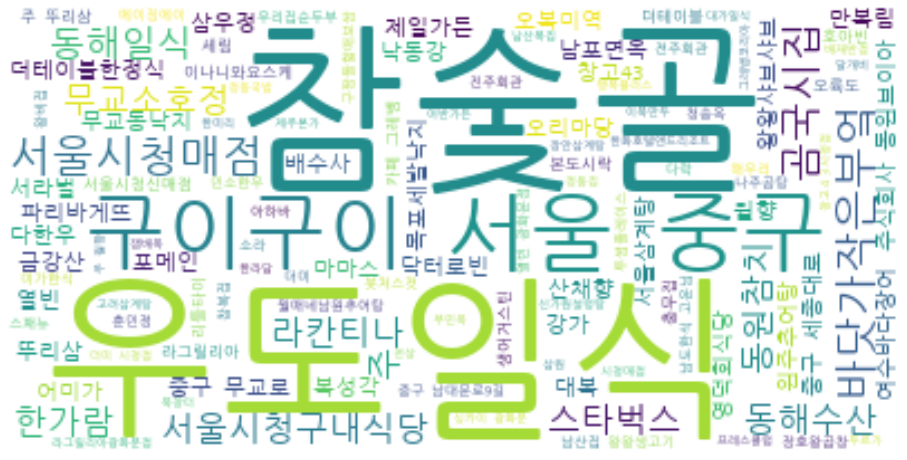

In [101]:
wordcloud = WordCloud(
    font_path='c:/wondows/fonts/나눔고딕코딩.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(df_shop['상호명']))
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()